   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


/tmp/ipython-input-649991250.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_std[:, 0], X_std[:, 1], s=40, cmap='viridis')


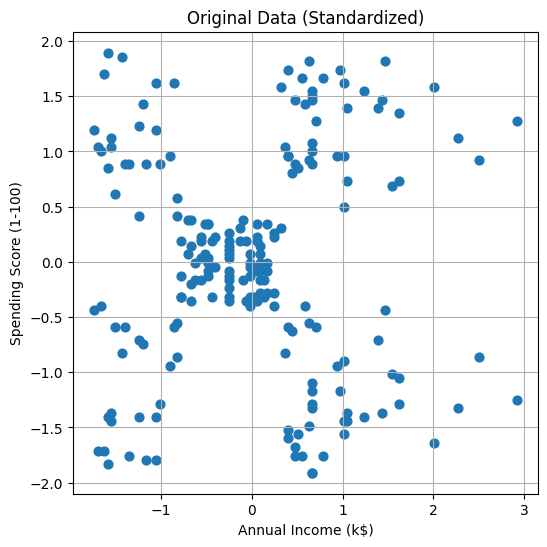

Means (Standardized):
 [[-0.45357729 -0.01714042]
 [ 1.07435375  1.30354965]
 [ 1.1193692  -1.38356759]]

Weights (Mixing Coefficients):
 [0.70719475 0.15527327 0.13753198]


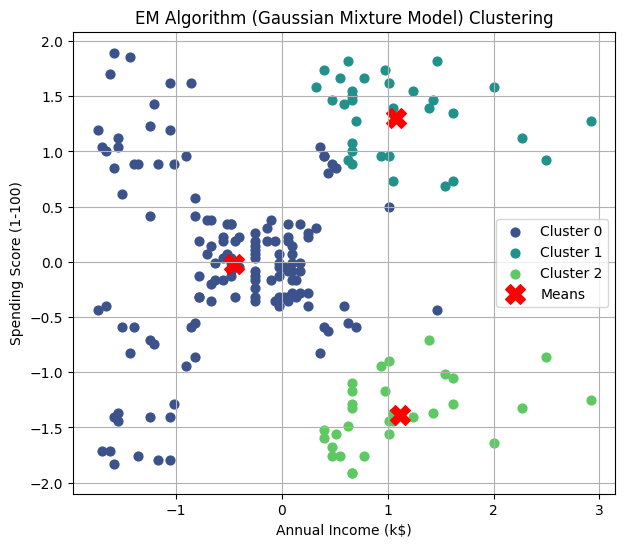

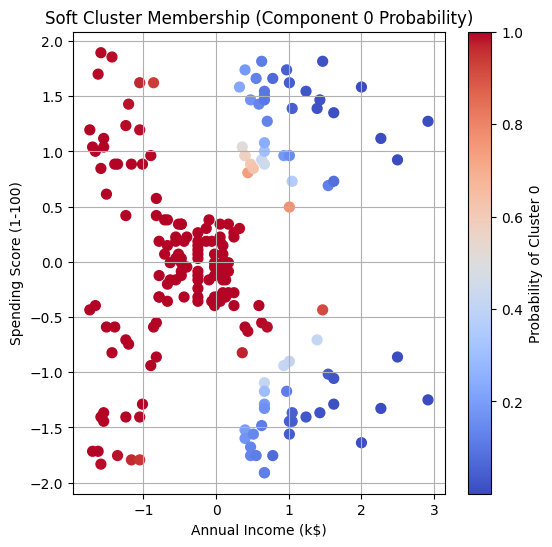

Components=1 | AIC=1145.13 | BIC=1161.62
Components=2 | AIC=1117.60 | BIC=1153.88
Components=3 | AIC=1095.65 | BIC=1151.72
Components=4 | AIC=1003.63 | BIC=1079.49
Components=5 | AIC=963.00 | BIC=1058.65


In [1]:
#"https://www.kaggle.com/datasets/shwetabh123/mall-customers?resource=download"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

df = pd.read_csv("Mall_Customers.csv")
print(df.head())

features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_std[:, 0], X_std[:, 1], s=40, cmap='viridis')
plt.title("Original Data (Standardized)")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()

n_components = 3  # you can change this
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(X_std)
labels = gmm.predict(X_std)
probs = gmm.predict_proba(X_std)

print("Means (Standardized):\n", gmm.means_)
print("\nWeights (Mixing Coefficients):\n", gmm.weights_)

plt.figure(figsize=(7,6))
palette = sns.color_palette("viridis", n_components)
for k in range(n_components):
    cluster = X_std[labels == k]
    plt.scatter(cluster[:,0], cluster[:,1], s=40, color=palette[k], label=f"Cluster {k}")
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], s=200, c='red', marker='X', label='Means')
plt.title("EM Algorithm (Gaussian Mixture Model) Clustering")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
sc = plt.scatter(X_std[:,0], X_std[:,1], c=probs[:,0], cmap='coolwarm', s=50)
plt.colorbar(sc, label='Probability of Cluster 0')
plt.title("Soft Cluster Membership (Component 0 Probability)")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()

for k in range(1,6):
    g = GaussianMixture(n_components=k, random_state=0)
    g.fit(X_std)
    print(f"Components={k} | AIC={g.aic(X_std):.2f} | BIC={g.bic(X_std):.2f}")